> Vania Oliveira
> student_ID:  10607174



> Course Title:  MSc in Data Analytics

> Lecturer Name: Courtney Ford

> Module/Subject Title:  Machine Learning and Pattern Recognition

> Assignment Title: CA_TWO TASK 3











# **Twitter US Airline Sentiment Analysis**


### Importing and downloading the necessary packages and libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import cprint
import re

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.tag import pos_tag

from wordcloud import WordCloud,STOPWORDS


In [5]:
!pip install mlxtend
nltk.download('stopwords')
!pip install wordcloud
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger')
!pip install termcolor


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## **Exploratory Data Analysis - EDA**

The tweets csv file is uploaded to the google colab and then read using pandas to further process. The dataset has 14640 entries and is a mixture of both categorical and numerical columns.

**airline_sentiment** is the target column and has 3 classes in it.

1.   Negative
2.   Positive
3.   Neutral



In [6]:
df= pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


## **Data Preprocessing**

The dataset had missing values on several columns. The dataset has a total of 14640 entries across 15 columns. Out of these 3 columns had more than 90% data missing.


1.   tweet_coord
2.   airline_sentiment_gold  
3.   negativereason_gold



These columns do not contribute to the sentiment analysis and hence were dropped.


In [9]:
print("Shape of the dataframe is",df.shape)
print("\nThe number of nulls in each column are:\n",df.isna().sum())

Shape of the dataframe is (14640, 15)

The number of nulls in each column are:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [10]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.3+ MB


## **Data Vizualisation**

 Below is a bar chart illustrating the values for the 'airline_sentiment' column which if the column of interest(target). The plot clearly shows that a higher number of tweets contribute towards the negative sentiment.

 Further to this, the sentiments have been vizualised for each airline individually. United airlines has the highest number of tweets and Delta has the lowest.

 The negative sentiments are higher comparatively for all airlines, even when looked at individually.

Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


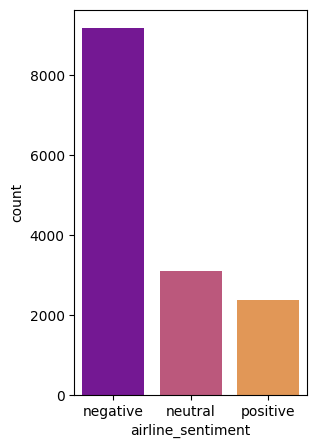

In [12]:
cprint("Total number of sentiments of tweets :",'blue')
print(df.airline_sentiment.value_counts())
plt.figure(figsize=(3,5))
sns.countplot(x=df['airline_sentiment'], order =df.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

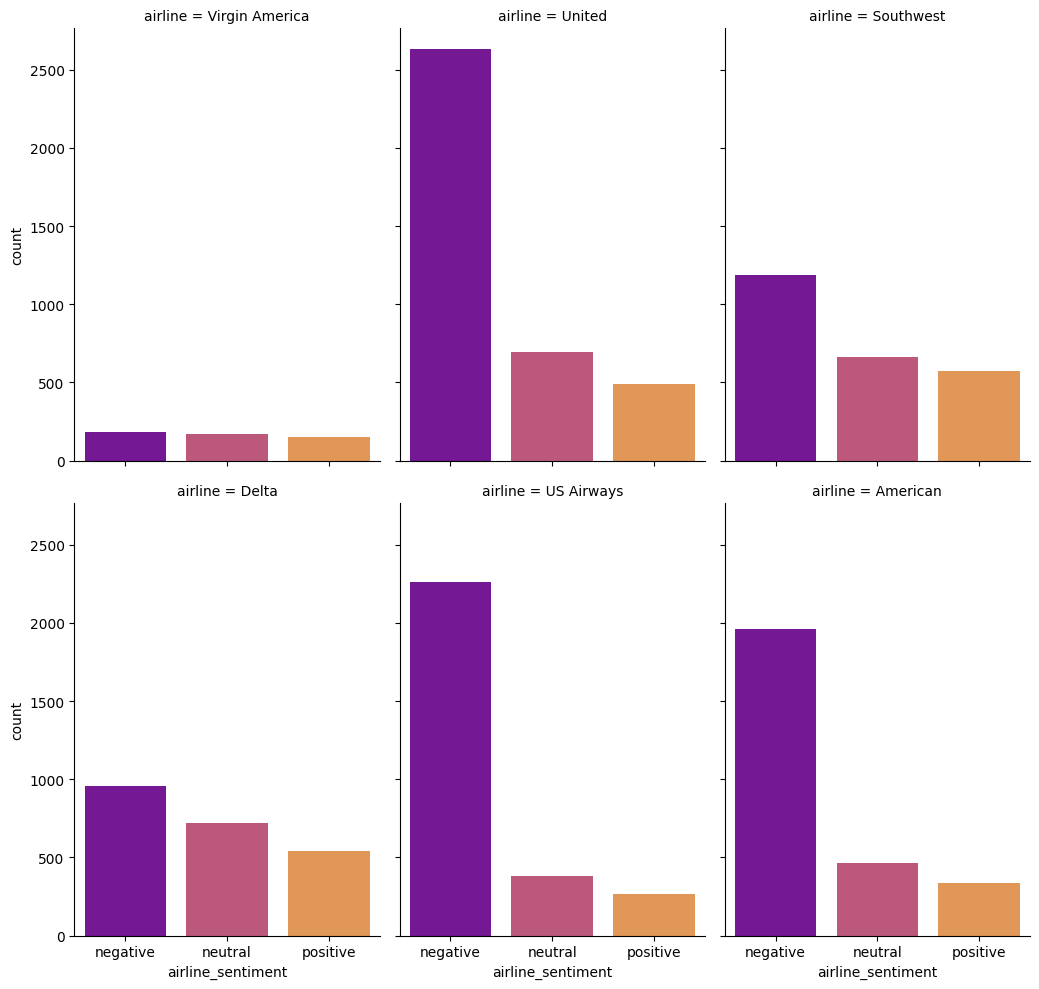

In [13]:
g = sns.FacetGrid(df, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =df.airline_sentiment.value_counts().index, palette='plasma')
plt.show()

## **Text preprocessing**


For the sentiment analysis, the main source is the **text** column. The text column has the tweet posted by the customer has several unnecessary information that needs to be removed before it could be used with the training model. Text like hashtags, tags, web urls, etc. Along with these, the stopwords also need to be removed as these do not provide any information relative to the sentiment and are always in a high frequency. Removing these stopwords also speeds up the training.

The function **tokenize** is defined and used to apply all these changes to the text data.

The function performs the following steps on the tweet text:

- tweetlower: change the text to lowercase.

- meaningful_words: splits the text into words and then removes words/text with web urls, tags, hashtags etc and also the stopwords. it rejoins the filtered words to a text.

- letters_only: uses the re(regular expression) to replace special characters by " " (single white space).

- words: uses the wordpunct_tokenize to split the text into individual words based on punctuation and whitespace.

- tags: tags are added to the words using the 'pos_tag' function which labels words according to their part of speech (adjective, verb, noun...). The argument "tagset=universal'is a  standardized format of tags and the language paramter 'lang' is set to English.

- dt_tags: the tagged words are filtered for only adjectives using the class "ADJ". These adjectives directly reflect the sentiment and are used in the wordclouds to list the high frequency words.

- return: returns dt_tags and words joined by spaces.

#### The **tokenize** function returns two texts, one that has only the adjectives (**dt_tags**) which is used to build the word clouds with the highest frequency. However, for training the model , we would still need all the words, so the **words** text is also returned.



In [14]:
stops = set(stopwords.words("english"))

def tokenize(tweet):

    tweetlower=tweet.lower()

    meaningful_words = " ".join([word for word in tweetlower.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word not in stops
                                and word not in ["american","united","delta","southwest","us airways","virgin america"]
                            ])

    letters_only = re.sub("[^a-zA-Z]", " ",meaningful_words)
    words = wordpunct_tokenize(letters_only)



    tags = nltk.pos_tag(words,tagset='universal',lang='eng')
    dt_tags = [t[0] for t in tags if t[1] ==  "ADJ"]

    return " ".join(dt_tags)," ".join(words)


The returned lists of **dt_tags** and **words** are added as new columns "**clean_tweet_adj**" and "**clean_tweet_words**" respectively to the dataset dataframe. The clean_tweet_adj is the list of adjective text for the wordcloud and clean_tweet_words is the list of texts for training.

In [15]:
#applying our TOKENIZE function on each of the tweets. For the function to go through the tweets, we use lambda
#df[],df[']

df['clean_tweet_adj'],df['clean_tweet_words']=zip(*df['text'].apply(lambda x: tokenize(x)))


#### The tweets are now clean and free of noise.Even after being filtered for adjectives, a few irrelevant words like "i","u" etc showed up in the high frequency list. These are again filtered out while creating the wordcloud.

In [16]:
df['clean_tweet_adj']

0                                       
1                                  added
2                                       
3        aggressive obnoxious amp little
4                                big bad
                      ...               
14635                          different
14636                   late late shitty
14637                                   
14638                                   
14639                  many next standby
Name: clean_tweet_adj, Length: 14640, dtype: object

In [17]:
df['clean_tweet_words']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minutes late flight warnings communica...
14637                     please bring airlines blackberry
14638    money change flight answer phones suggestions ...
14639    ppl need know many seats next flight plz put u...
Name: clean_tweet_words, Length: 14640, dtype: object

## **Creating the word clouds**



#### In this step,  clouds are created containing the 15 most cited words in the tweets, divided into: positive, neutral and negative. The 'WordCloud' function is used to build the clouds. Some parameters were adopted, such as: background color,colormap,cloud width and height, as well as the number of words per cloud (in this case 15),repeat (set to not repeat any words), besides the variable 'clean_tweet_adj' which contains only adjectives.

#### It is interesting to note that in all three clouds the word 'good' appears, even though it is a word that belongs to the group with the fewest number of tweets. The cloud of positive words is the most coherent with its content, while the negative cloud brings some words that do not match (flighted, new, next).

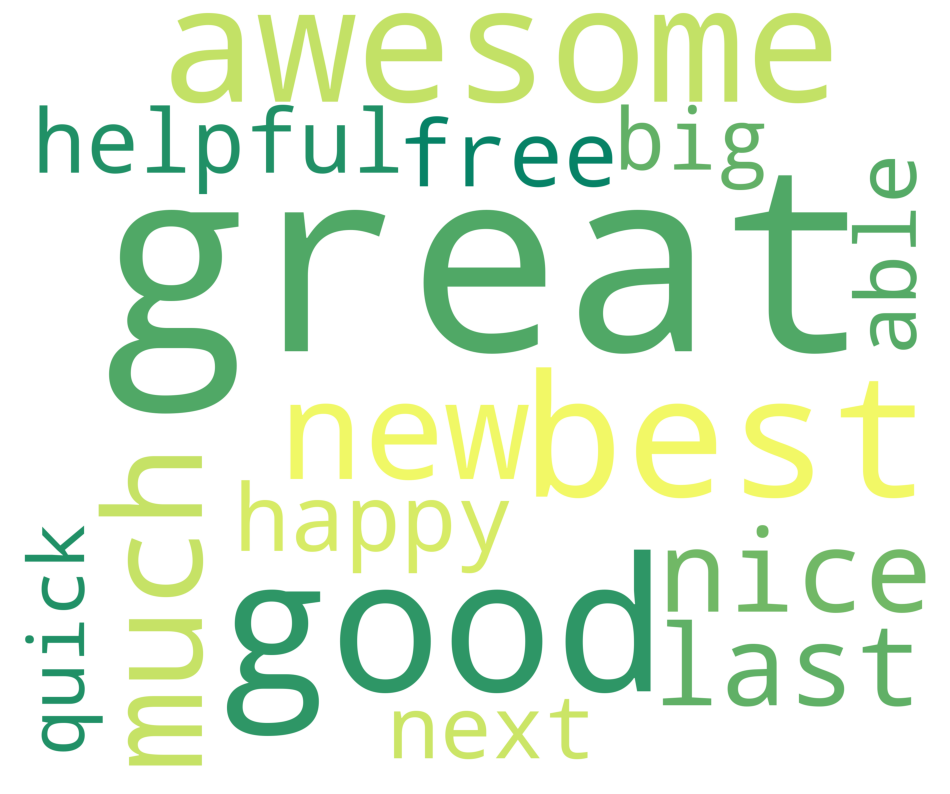

In [18]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(map(str, new_df['clean_tweet_adj']))
wordcloud = WordCloud(stopwords=['u','i','s'],
                      background_color='white',
                      width=3000,
                      height=2500,
                      max_words=15,
                      colormap='summer',
                      repeat=False
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

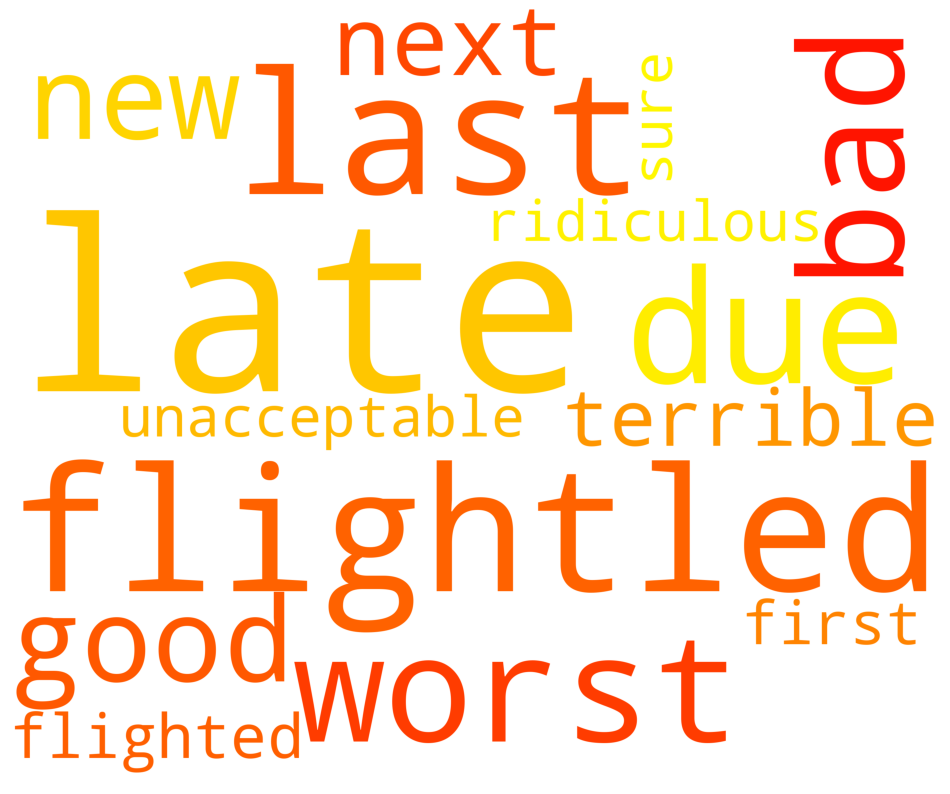

In [19]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(map(str, new_df['clean_tweet_adj']))
wordcloud = WordCloud(stopwords=['u','ua','i','s'],
                      background_color='white',
                      width=3000,
                      height=2500,
                      max_words=15,
                      colormap='autumn',
                      repeat=False
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

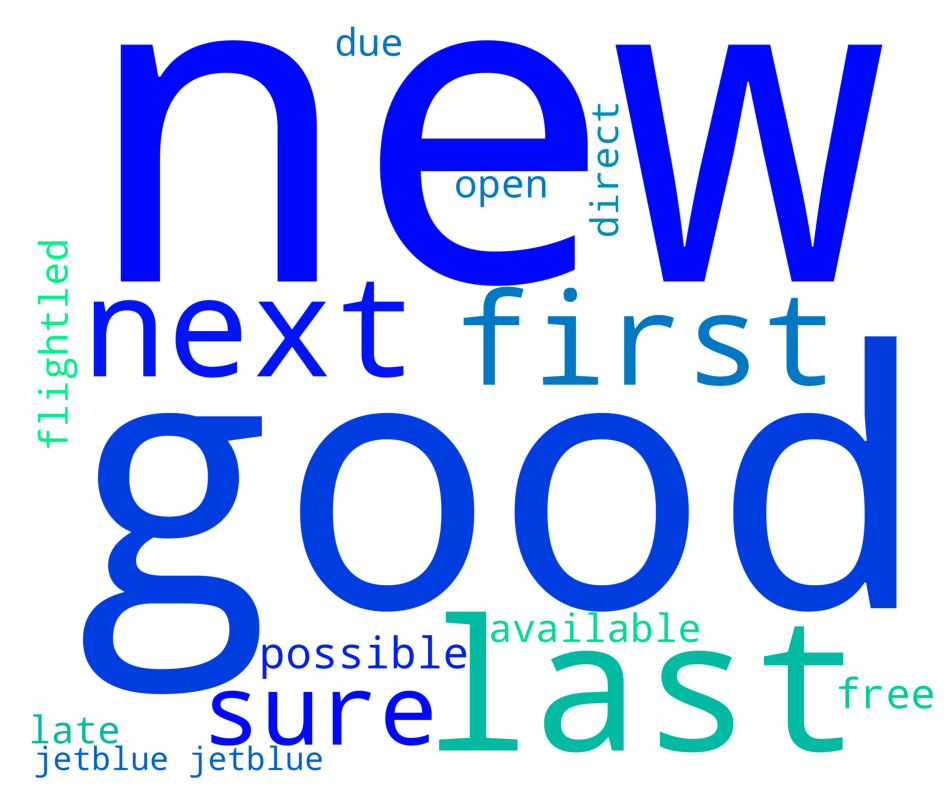

In [20]:
new_df=df[df['airline_sentiment']=='neutral']
words = ' '.join(map(str, new_df['clean_tweet_adj']))

wordcloud = WordCloud(stopwords=['u','ua','s','i'],
                      background_color='white',
                      width=3000,
                      height=2500,
                      max_words=15,
                      colormap='winter',
                      repeat=False
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## **Splitting the dataset for training**

#### The 'train_test_split' function was used to split the data in 80/20 ratio. Two lists - train and test were created by appending the rows of '**clean_tweet_words**' column to the lists.

In [21]:
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [22]:
train_clean_tweet=[]
for tweet in train['clean_tweet_words']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet_words']:
    test_clean_tweet.append(tweet)

#### This is an important step for data to be used in models such as Logistic Regression or Naive Bayes. CountVectorize is responsible for transforming text documents into a matrix of tokens. The function is applied on both train and test datasets t transform the data and two matrix variables 'train_features' and 'test_features' are created representing the training and test data respectively.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

## Logistic Regression

#### To perform Logistic Regression we have to transform our variables 'train_features' and 'test_features' which are sparse matrices into dense matrices, which are better accepted for ML models. For this we use the '.toarray'.

#### The classifier LogisticRegression is imported and applied to the train data for training the model.

#### The confusion matrix is plotted to analyse the results.

Accuracy of LogisticRegressionis 0.7920081967213115
              precision    recall  f1-score   support

    negative       0.88      0.85      0.87      1966
     neutral       0.57      0.60      0.59       552
    positive       0.69      0.77      0.73       410

    accuracy                           0.79      2928
   macro avg       0.72      0.74      0.73      2928
weighted avg       0.80      0.79      0.79      2928



<Figure size 640x480 with 0 Axes>

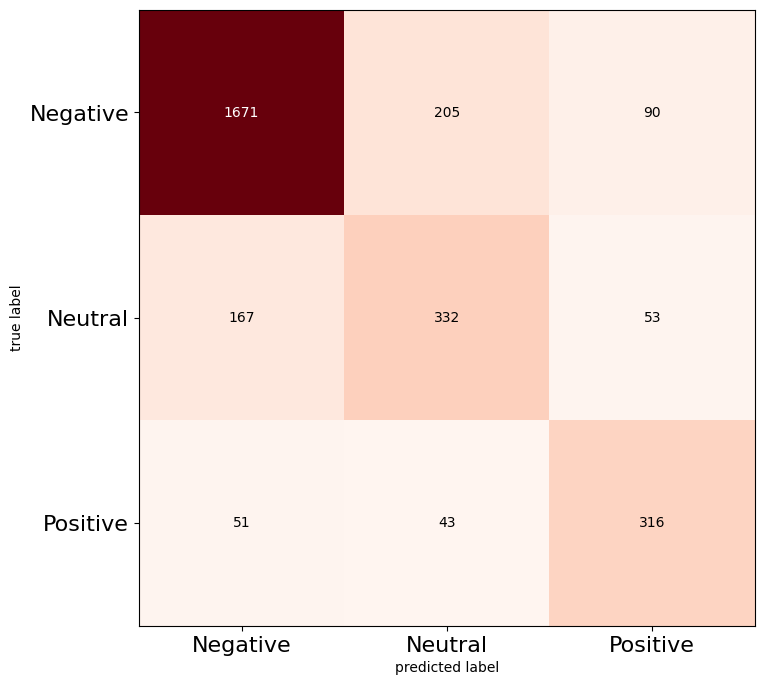

In [24]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()

classifier=LogisticRegression(max_iter=1000)

fit = classifier.fit(train_features,train['airline_sentiment'])
pred = fit.predict(test_features)
accuracy = accuracy_score(pred,test['airline_sentiment'])
print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
print(classification_report(pred,test['airline_sentiment']))
cm = confusion_matrix(pred , test['airline_sentiment'])
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

# Naive Bayes

#### We also used the Multinomial Naive Bayes to train the model and compare with Logistic Regression.

Accuracy of MultinomialNBis 0.7920081967213115
              precision    recall  f1-score   support

    negative       0.94      0.79      0.86      2247
     neutral       0.37      0.66      0.48       328
    positive       0.61      0.80      0.69       353

    accuracy                           0.78      2928
   macro avg       0.64      0.75      0.68      2928
weighted avg       0.84      0.78      0.80      2928



<Figure size 640x480 with 0 Axes>

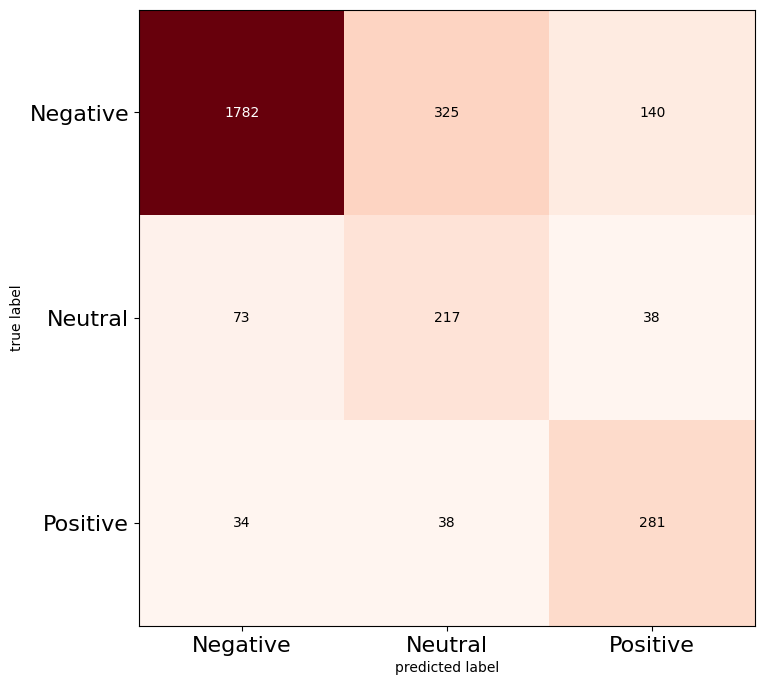

In [25]:
nb = MultinomialNB()

fit_1 = nb.fit(train_features,train['airline_sentiment'])
pred_1 = fit_1.predict(test_features)
accuracy_1 = accuracy_score(pred_1,test['airline_sentiment'])
print('Accuracy of '+nb.__class__.__name__+'is '+str(accuracy))
print(classification_report(pred_1,test['airline_sentiment']))

cm_1 = confusion_matrix(pred_1 , test['airline_sentiment'])
plt.figure()
plot_confusion_matrix(cm_1,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

# **Comparisons and Conclusions**

### During the data processing process, it was interesting to observe how small details make a difference in the final result, such as the use of parts of speech tags, which brought quality to the clouds, but were not very good for the training the models.

### The results of the applied models (Logistic Regression and Naive Bayes) show close accuracy values. But observing the confusion matrix, it is clear that both models recognize negative tweets well.

### The recall for postitive tweets and negative tweets are good enough suggesting both of them can be predicted most accurately. But the precision for positive tweets is low suggesting that some of them could be wrongly classified.

### But logistic regression recognises neutral tweets better than Naive Bayes. Even though the accuracy is good enough,the models might not work well with neutral tweets. These models are good for predicting the negative tweets.


